In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

In [3]:
RAW_PATH = "../NCTE_Transcripts/raw/"
PROC_PATH = "../NCTE_Transcripts/processed/"

single = pd.read_csv(os.path.join(RAW_PATH, 'ncte_single_utterances.csv'))

print("Initial dataset shape:", single.shape)
print("\nColumns:", single.columns.tolist())

single.head()

Initial dataset shape: (580408, 9)

Columns: ['speaker', 'text', 'year', 'OBSID', 'video_id', 'cleaned_text', 'num_words', 'turn_idx', 'comb_idx']


,speaker,text,year,OBSID,video_id,cleaned_text,num_words,turn_idx,comb_idx
0,teacher,"Friends, yesterday we started off by working o...",2,2119,706,friends yesterday we started off by working on...,13,0,2119_0
1,student,Yes.,2,2119,706,yes,1,1,2119_1
2,teacher,"And yesterday towards the end of the period, y...",2,2119,706,and yesterday towards the end of the period yo...,38,2,2119_2
3,multiple students,Yes.,2,2119,706,yes,1,3,2119_3
4,teacher,Some of you might be done. If you are finishe...,2,2119,706,some of you might be done if you are finished ...,106,4,2119_4


In [4]:
# missingness - column name is index, has (%) missing column and dtype column
missings = pd.DataFrame({
    'missing_count': single.isnull().sum(),
    'missing_percent': single.isnull().mean() * 100,
    'dtype': single.dtypes
})
display(missings)

,missing_count,missing_percent,dtype
speaker,13,0.002240,str
text,0,0.000000,str
year,0,0.000000,int64
OBSID,0,0.000000,int64
video_id,0,0.000000,int64
cleaned_text,50,0.008615,str
num_words,0,0.000000,int64
turn_idx,0,0.000000,int64
comb_idx,0,0.000000,str


In [5]:
# our cleaned data
cleaned = pd.read_csv(os.path.join(PROC_PATH, 'ncte_single_utterances_cleaned.csv'))
pd.DataFrame({
    'missing_count': cleaned.isnull().sum(),
    'missing_percent': cleaned.isnull().mean() * 100,
    'dtype': cleaned.dtypes
})

,missing_count,missing_percent,dtype
speaker,13,0.002240,str
text,0,0.000000,str
year,0,0.000000,int64
OBSID,0,0.000000,int64
video_id,0,0.000000,int64
cleaned_text,50,0.008615,str
num_words,0,0.000000,int64
turn_idx,0,0.000000,int64
comb_idx,0,0.000000,str
cleaned_text_v2,34616,5.964080,str


In [6]:
# count average # of utterances per OBSID
utterance_counts = cleaned.groupby('OBSID').size()
print("Average number of utterances per OBSID:", utterance_counts.mean())

Average number of utterances per OBSID: 349.6433734939759


In [25]:
meta = pd.read_csv(os.path.join(RAW_PATH, 'transcript_metadata.csv'))
meta.head()

,OBSID,year,student_text,teacher_text,student_cleaned,teacher_cleaned,NCTETID,DISTRICT,CLASS_11,CLASS_12,...,MALE,S_MALE,S_WHITE,S_AFAM,S_HISP,S_ASIAN,S_RACE_OTHER,S_FRPL,S_SPED,S_LEP
0,3,1,"C. Because 16 times 3 and 16 times 6, they bot...","Okay. Math should be out. Everything else, p...",c because 16 times 3 and 16 times 6 they both ...,okay math should be out everything else please...,11024,11.0,1.0,1.0,...,1.0,0.500000,0.111111,0.055556,0.777778,0.0,0.055556,0.833333,0.000000,0.333333
1,141,1,North? Up. Compass. Yes. It's here. South. Wes...,Okay. So today we're going to solve some addi...,north up compass yes it s here south west east...,okay so today we re going to solve some additi...,11024,11.0,1.0,1.0,...,1.0,0.500000,0.111111,0.055556,0.777778,0.0,0.055556,0.833333,0.000000,0.333333
2,452,1,"Yep. The number, the oranges in four groups. I...",Okay. You have about five minutes to try to s...,yep the number the oranges in four groups it s...,okay you have about five minutes to try to sol...,11024,11.0,1.0,1.0,...,1.0,0.500000,0.111111,0.055556,0.777778,0.0,0.055556,0.833333,0.000000,0.333333
3,2198,2,"[Inaudible comment]. Twenty-seven. Yep. Oh, we...","Okay, I need everybody [sitting] right now. O...",inaudible comment twenty seven yep oh we could...,okay i need everybody sitting right now okay s...,11024,11.0,1.0,1.0,...,1.0,0.733333,0.000000,0.066667,0.933333,0.0,0.000000,0.600000,0.266667,0.600000
4,2531,2,"320. [Inaudible] 320. Cause 4 times 8, it’s th...","[Inaudible] either way, if you are finished cu...",320 inaudible 320 cause 4 times 8 it s the sam...,inaudible either way if you are finished cutti...,11024,11.0,1.0,1.0,...,1.0,0.733333,0.000000,0.066667,0.933333,0.0,0.000000,0.600000,0.266667,0.600000


In [ ]:
# save list of metadata columns because it's too big to display in a notebook
with open(os.path.join(RAW_PATH, 'metadata_columns.txt'), 'w') as f:
    f.write(
'\n'.join(meta.columns)
    )

In [ ]:
# save missingness of metadata to a csv because it's too big to display in a notebook
meta.isna().mean().sort_values(ascending=False).to_csv(os.path.join(PROC_PATH, 'metadata_missingness.csv'))

In [ ]:
# merge cleaned transcripts with metadata on OBSID
joined = cleaned.merge(meta, on='OBSID', how='left')

# analysis

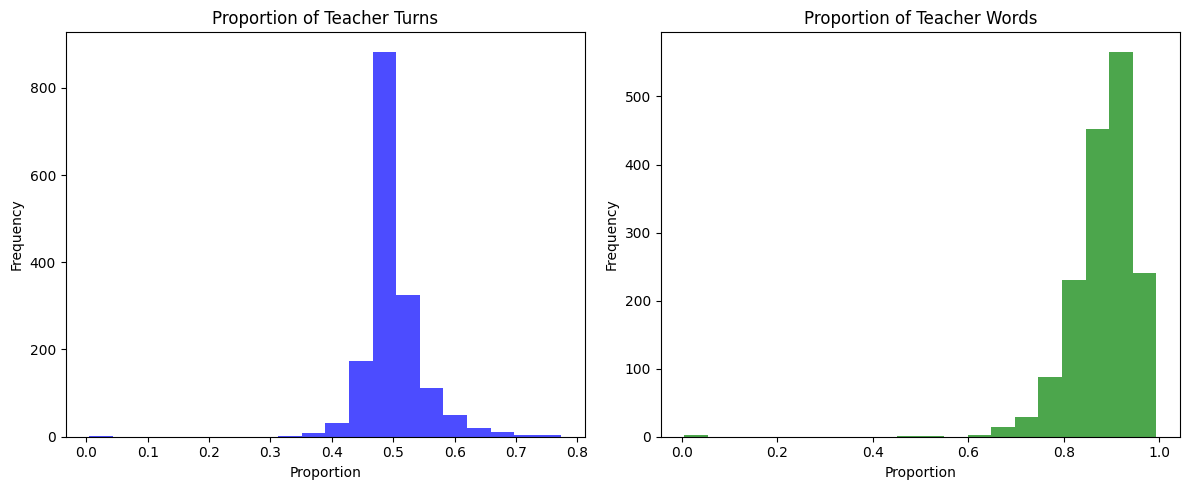

In [ ]:
# for each teacher (NCTETID), for each observation (OBSID), count:
# - proportion of turns made by teacher vs student, 
# - total words spoken by teacher vs student
teacher_student_ratio = joined.groupby(['NCTETID', 'OBSID']).apply(
    lambda x: pd.Series({
        'teacher_turns': x['is_teacher'].sum(),
        'student_turns': x['is_student'].sum(),
        'total_turns': len(x),
        'teacher_words': x.loc[x['is_teacher'], 'num_words_v2'].sum(),
        'student_words': x.loc[x['is_student'], 'num_words_v2'].sum(),
        'total_words': x['num_words_v2'].sum()
    })
).reset_index()

teacher_student_ratio['prop_teacher_turns'] = teacher_student_ratio['teacher_turns'] / teacher_student_ratio['total_turns']
teacher_student_ratio['prop_teacher_words'] = teacher_student_ratio['teacher_words'] / teacher_student_ratio['total_words']

# plot histograms of the proportions
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(teacher_student_ratio['prop_teacher_turns'], bins=20, color='blue', alpha=0.7)
plt.title('Proportion of Teacher Turns')
plt.xlabel('Proportion')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(teacher_student_ratio['prop_teacher_words'], bins=20, color='green',
            alpha=0.7)
plt.title('Proportion of Teacher Words')
plt.xlabel('Proportion')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Regression results for prop_teacher_turns:
                            OLS Regression Results                            
Dep. Variable:              STATEVA_M   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.657
Date:                Mon, 26 Jan 2026   Prob (F-statistic):              0.198
Time:                        14:25:02   Log-Likelihood:                 749.25
No. Observations:                1581   AIC:                            -1494.
Df Residuals:                    1579   BIC:                            -1484.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

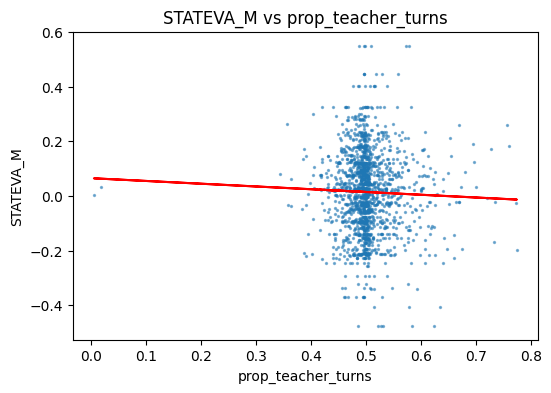

Regression results for prop_teacher_words:
                            OLS Regression Results                            
Dep. Variable:              STATEVA_M   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     6.543
Date:                Mon, 26 Jan 2026   Prob (F-statistic):             0.0106
Time:                        14:25:03   Log-Likelihood:                 751.69
No. Observations:                1581   AIC:                            -1499.
Df Residuals:                    1579   BIC:                            -1489.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

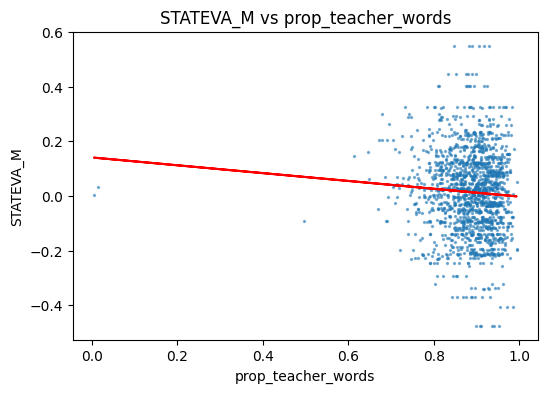

In [63]:
# regress each of these proportions as predictors of STATEVA_M
import statsmodels.api as sm
if 'STATEVA_M' not in teacher_student_ratio.columns:
    teacher_student_ratio = teacher_student_ratio.merge(
        meta[['NCTETID', 'OBSID', 'STATEVA_M']].drop_duplicates(),
        on=['NCTETID', 'OBSID'], how='left'
    )

for prop_col in ['prop_teacher_turns', 'prop_teacher_words']:
    subset = teacher_student_ratio.dropna(subset=[prop_col, 'STATEVA_M'])
    X = sm.add_constant(subset[[prop_col]])
    y = subset['STATEVA_M']
    model = sm.OLS(y, X).fit()
    print(f"Regression results for {prop_col}:")
    print(model.summary())
    print("\n")
    # plot scatter plot with regression line
    plt.figure(figsize=(6, 4))
    plt.scatter(subset[prop_col], subset['STATEVA_M'], alpha=0.5, s=2)
    plt.plot(subset[prop_col], model.predict(X), color='red')
    plt.title(f'STATEVA_M vs {prop_col}')
    plt.xlabel(prop_col)
    plt.ylabel('STATEVA_M')
    plt.show()



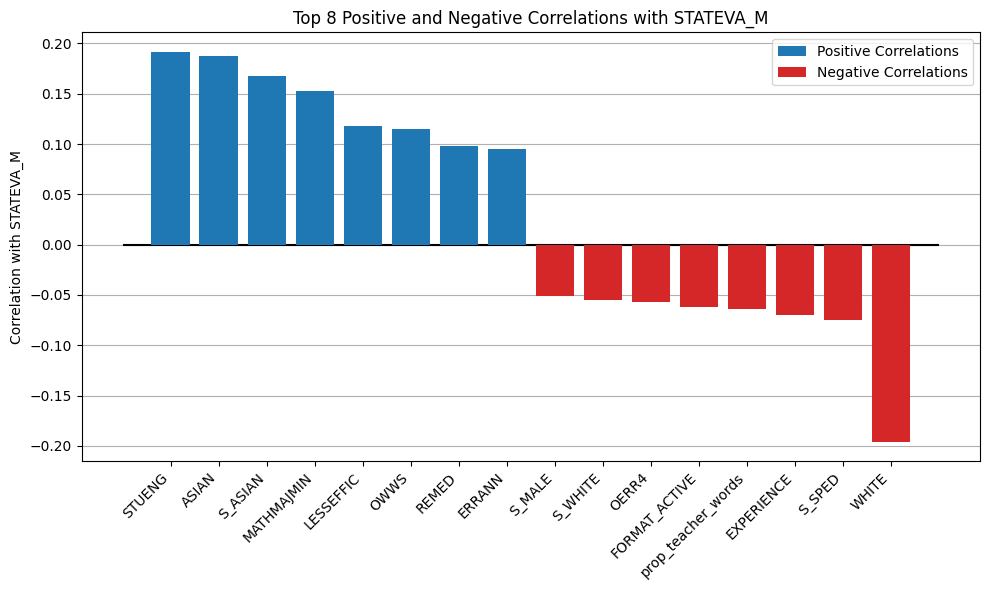

In [72]:
# correlation in metadata between numeric columns and STATEVA_M
numeric_meta = meta.select_dtypes(include=[np.number])
correlations = numeric_meta.merge(teacher_student_ratio.drop(columns='STATEVA_M'), on=['NCTETID', 'OBSID']).corr()['STATEVA_M'].sort_values(ascending=False)
correlations.to_csv(os.path.join(PROC_PATH, 'metadata_stateva_m_correlations.csv'))
correlations = correlations.dropna()

# bar plot of top 8 positive and negative correlations, excluding columns containing 'STATEVA_M'
top_pos = correlations[~correlations.index.str.contains('STATEVA_M')].head(8)
top_neg = correlations[~correlations.index.str.contains('STATEVA_M')].tail(8)
plt.figure(figsize=(10, 6))
plt.bar(top_pos.index, top_pos.values, color='tab:blue', label='Positive Correlations', zorder=3)
plt.bar(top_neg.index, top_neg.values, color='tab:red', label='Negative Correlations', zorder=3)
plt.grid(axis='y', zorder=0)
plt.xticks(rotation=45, ha='right')
plt.hlines(0, xmin=-1, xmax=16, colors='black')
plt.ylabel('Correlation with STATEVA_M')
plt.title('Top 8 Positive and Negative Correlations with STATEVA_M')
plt.legend()
plt.tight_layout()
plt.show()

Regression results for STUENG:
                            OLS Regression Results                            
Dep. Variable:              STATEVA_M   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     3673.
Date:                Mon, 26 Jan 2026   Prob (F-statistic):               0.00
Time:                        14:26:56   Log-Likelihood:                 61390.
No. Observations:              111399   AIC:                        -1.228e+05
Df Residuals:                  111397   BIC:                        -1.228e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1406

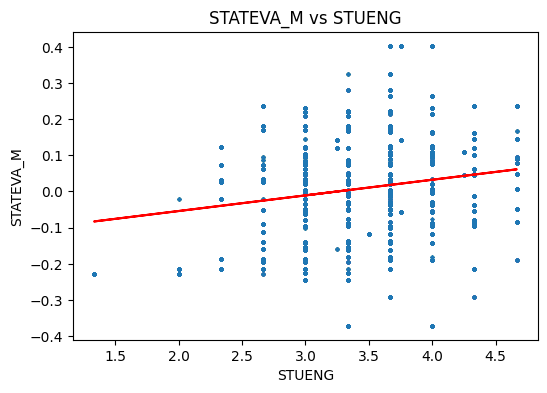

In [64]:
# regress STUENG vs STATEVA_M and plot
subset = joined.dropna(subset=['STUENG', 'STATEVA_M'])
X = sm.add_constant(subset[['STUENG']])
y = subset['STATEVA_M']
model = sm.OLS(y, X).fit()
print("Regression results for STUENG:")
print(model.summary())
# plot scatter plot with regression line
plt.figure(figsize=(6, 4))
plt.scatter(subset['STUENG'], subset['STATEVA_M'], alpha=0.5, s=2)
plt.plot(subset['STUENG'], model.predict(X), color='red')
plt.title('STATEVA_M vs STUENG')
plt.xlabel('STUENG')
plt.ylabel('STATEVA_M')
plt.show()

Regression results for STUENG vs prop_teacher_turns:
                            OLS Regression Results                            
Dep. Variable:                 STUENG   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.629
Date:                Mon, 26 Jan 2026   Prob (F-statistic):              0.203
Time:                        14:30:59   Log-Likelihood:                -287.00
No. Observations:                 339   AIC:                             578.0
Df Residuals:                     337   BIC:                             585.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

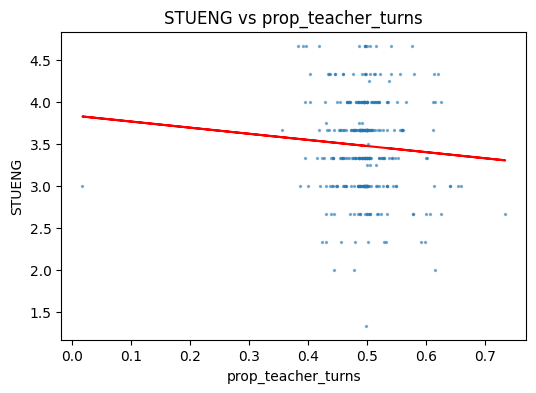

Regression results for STUENG vs prop_teacher_words:
                            OLS Regression Results                            
Dep. Variable:                 STUENG   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.162
Date:                Mon, 26 Jan 2026   Prob (F-statistic):              0.282
Time:                        14:31:00   Log-Likelihood:                -287.23
No. Observations:                 339   AIC:                             578.5
Df Residuals:                     337   BIC:                             586.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

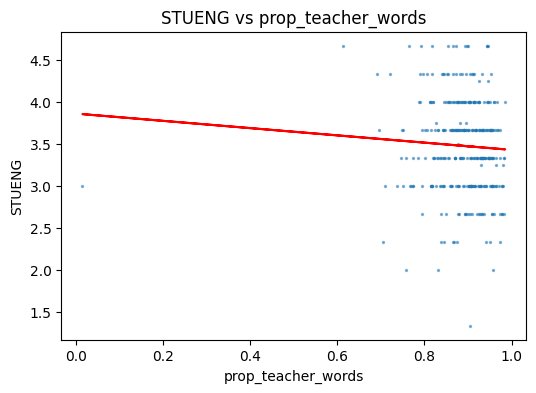

In [ ]:
# regression STUENG vs prop_teacher_words and prop_teacher_turns
for prop_col in ['prop_teacher_turns', 'prop_teacher_words']:
    subset = meta.merge(teacher_student_ratio, on=['NCTETID', 'OBSID']).dropna(subset=['STUENG', prop_col])
    X = sm.add_constant(subset[[prop_col]])
    y = subset['STUENG']
    model = sm.OLS(y, X).fit()
    print(f"Regression results for STUENG vs {prop_col}:")
    print(model.summary())
    print("\n")
    # plot scatter plot with regression line
    plt.figure(figsize=(6, 4))
    plt.scatter(subset[prop_col], subset['STUENG'], alpha=0.5, s=2)
    plt.plot(subset[prop_col], model.predict(X), color='red')
    plt.title(f'STUENG vs {prop_col}')
    plt.xlabel(prop_col)
    plt.ylabel('STUENG')
    plt.show()
    

In [71]:
corrs = numeric_meta.merge(teacher_student_ratio, on=['NCTETID', 'OBSID']).corr()['STATEVA_M_x']
corrs[~corrs.index.str.contains('STATEVA_M')].sort_values(ascending=False)

STUENG                0.191723
ASIAN                 0.187823
S_ASIAN               0.168084
MATHMAJMIN            0.152351
LESSEFFIC             0.118285
                        ...   
prop_teacher_words   -0.064240
EXPERIENCE           -0.069740
S_SPED               -0.074682
WHITE                -0.195740
AMINDIAN                   NaN
Name: STATEVA_M_x, Length: 126, dtype: float64